In [20]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats


In [26]:
# Import data and preprocessing
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

df_netherlands = df[(df['location'] == "Netherlands")]

X = pd.to_datetime(df_netherlands['date'], dayfirst=True)
y = df_netherlands[['total_cases']]

[]

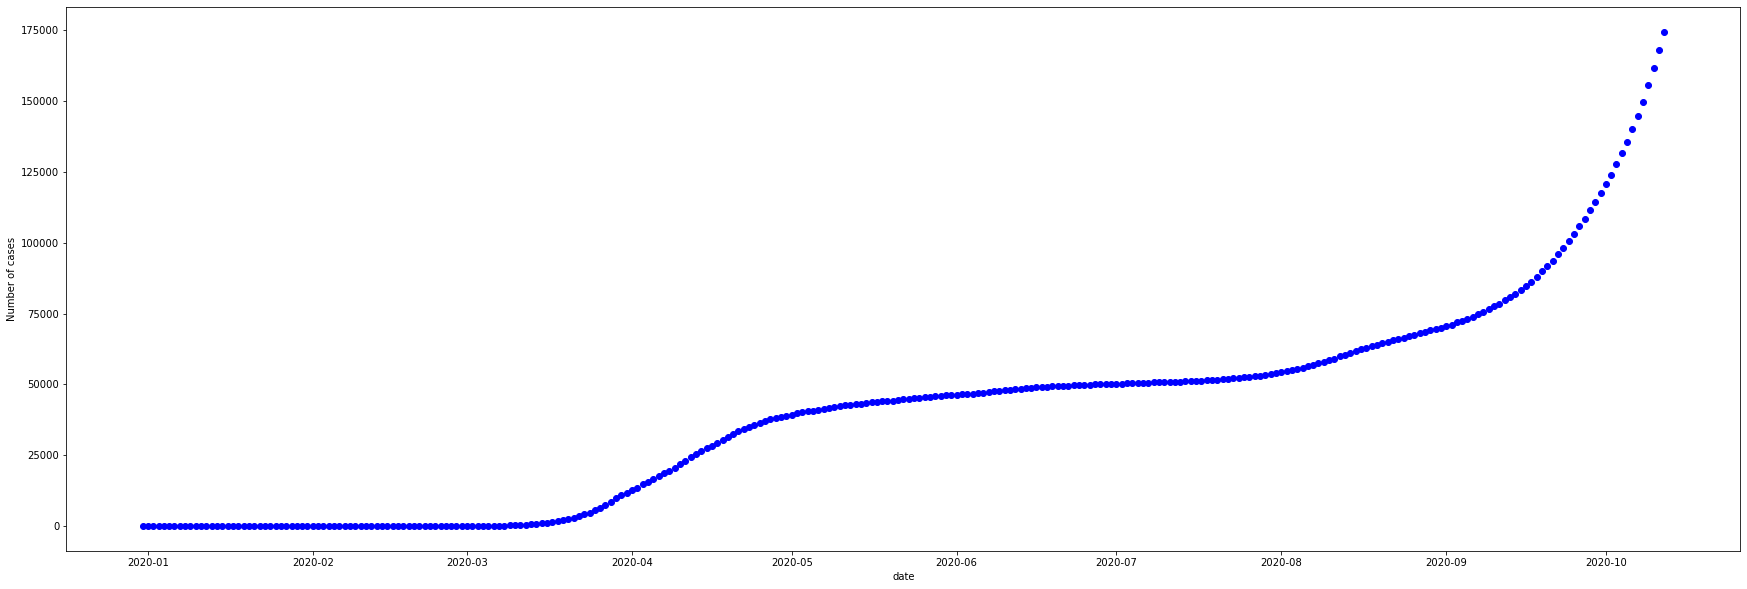

In [27]:
# Plotting the information
plt.rcParams["figure.figsize"] = (30, 10)
plt.scatter(X, y, color="blue")
plt.xlabel('date')
plt.ylabel('Number of cases')
plt.plot()

<ipython-input-46-2b1975c8c39e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netherlands['time'] = np.arange(len(df_netherlands.index))


[]

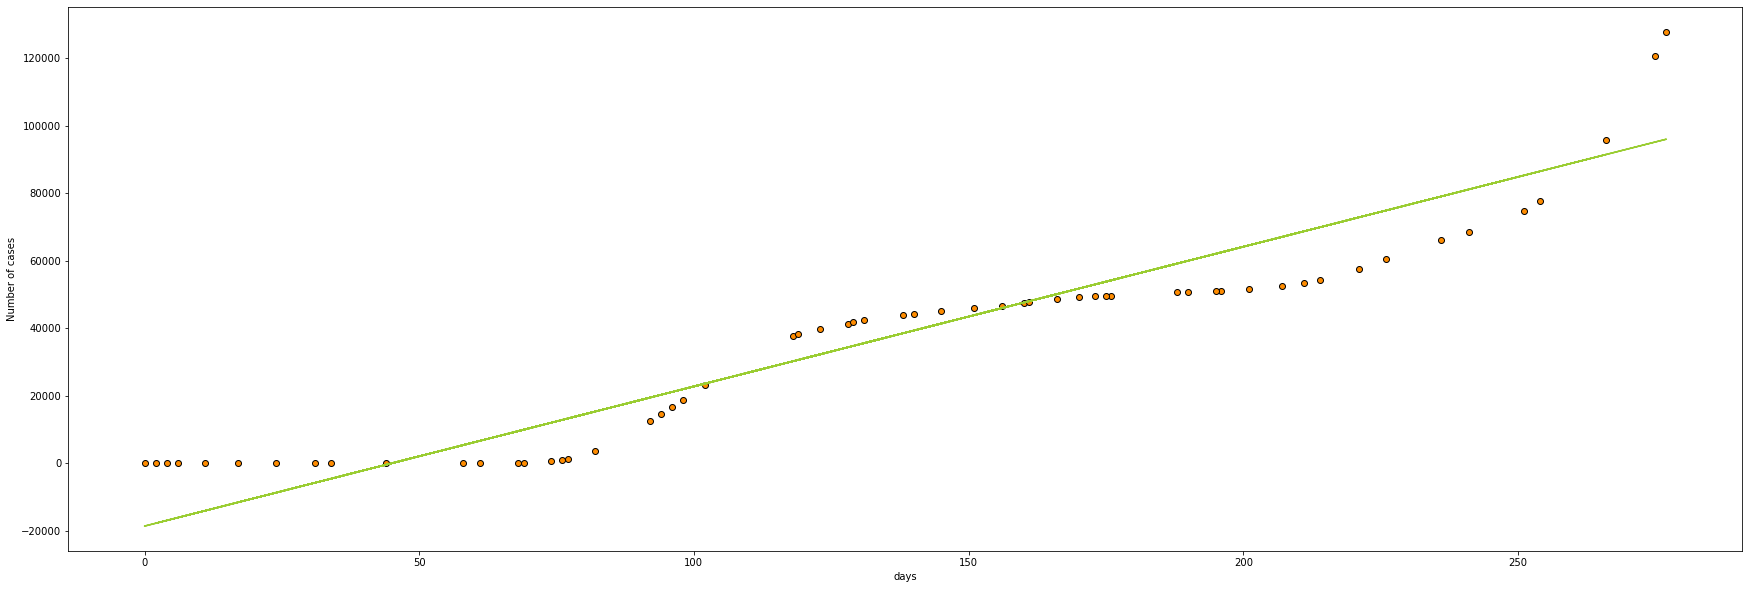

In [46]:

df_netherlands['time'] = np.arange(len(df_netherlands.index))
X = df_netherlands[['time']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
# X_train = X_train.reshape(1, -1)
# X_test = X_test.reshape(1, -1)

lr = LinearRegression()
lr.fit(X_train, y_train)
Y_predictions = lr.predict(X_test)
lr.score(X_test, y_test)

plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_test, Y_predictions, color="yellowgreen")
plt.xlabel('days')
plt.ylabel('Number of cases')
plt.plot()